In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load the TensorBoard notebook extension.
%load_ext tensorboard

In [3]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."

2024-09-13 20:32:29.171605: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


TensorFlow version:  2.17.0


In [4]:
import tensorboard
tensorboard.__version__

'2.17.1'

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from datetime import datetime
import tensorflow.keras as keras

# Generate sample data
data = np.array([[i, i + 1] for i in range(100)])  # Use exp(i / 10) to keep values manageable
X = data[:-1]  # All but the last
y = data[1:, 0]  # Predict the first feature of the next time step

# Reshape data for RNN: (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Build RNN model
model = Sequential()
model.add(SimpleRNN(10, activation='relu', input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(1))  # Output layer
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the Keras TensorBoard callback.
logdir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

# Train the model
model.fit(X, y, epochs=200, verbose=0, callbacks=[tensorboard_callback])

# Make predictions
predictions = model.predict(X)
print(predictions)

/home/martin/miniconda3/envs/jupyter/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
[[ 1.2758772]
 [ 2.2716289]
 [ 3.2673807]
 [ 4.2631326]
 [ 5.258884 ]
 [ 6.2546363]
 [ 7.2503877]
 [ 8.246139 ]
 [ 9.241891 ]
 [10.237643 ]
 [11.233396 ]
 [12.229147 ]
 [13.224898 ]
 [14.22065  ]
 [15.216402 ]
 [16.212154 ]
 [17.207907 ]
 [18.20366  ]
 [19.19941  ]
 [20.195162 ]
 [21.190914 ]
 [22.186665 ]
 [23.182417 ]
 [24.17817  ]
 [25.17392  ]
 [26.16967  ]
 [27.165424 ]
 [28.161175 ]
 [29.156929 ]
 [30.15268  ]
 [31.148432 ]
 [32.14418  ]
 [33.139935 ]
 [34.13569  ]
 [35.13144  ]
 [36.127193 ]
 [37.12294  ]
 [38.118694 ]
 [39.114445 ]
 [40.110195 ]
 [41.10595  ]
 [42.1017   ]
 [43.097454 ]
 [44.09321  ]
 [45.08896  ]
 [46.08471  ]
 [47.08046  ]
 [48.07621  ]
 [49.071964 ]
 [50.067715 ]
 [51.06347  ]
 [52.05922  ]
 [53.05497  ]
 [54.050724 ]
 [55.04648  ]
 [56.04223  ]
 [57.03798  ]
 [58.03373  ]
 [59.029484 ]
 [60.025234 ]
 [61.02099  ]
 [62.01674  ]
 [63.01249  ]
 [64.00824  ]
 [65.00399  ]
 [65.99974  ]
 [66.9955   ]
 [67.99125  ]
 [68.987  

In [6]:
model.predict(np.array([[70.0, 71.0]]).reshape(1, 1, 2))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


array([[70.97851]], dtype=float32)

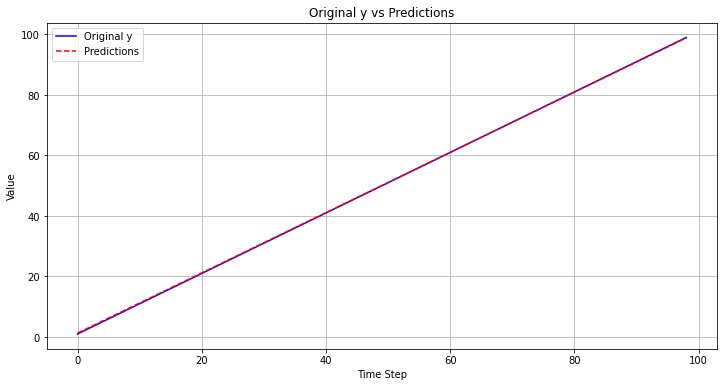

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from datetime import datetime
import tensorflow.keras as keras
import matplotlib.pyplot as plt

# Plot original data and predictions
plt.figure(figsize=(12, 6))

# Plot original y values
plt.plot(y, label='Original y', color='blue')

# Plot predictions
plt.plot(predictions, label='Predictions', color='red', linestyle='--')

# Adding labels and title
plt.title('Original y vs Predictions')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [8]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 129761), started 0:14:32 ago. (Use '!kill 129761' to kill it.)